# Model Comparison & Evaluation

Comprehensive comparison of model variants:
- **M0 (Baseline)**: Base model (no fine-tuning)
- **M1 (Trained)**: Iteratively trained model from notebook 03

## Evaluation Criteria
1. Generic code generation quality
2. CDK-specific code generation
3. Syntax validity
4. Keyword matching
5. Inference latency
6. Overall improvement metrics

In [1]:
import sys
import json
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List

In [2]:
# Add project root to path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

print(f"Project root: {project_root}")

Project root: /storage/homefs/ai22t082/code_complete


In [3]:
# Set up plotting
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

# Paths
from src.config import EVAL_DIR, BASELINE_FILE, TRAINED_FILE, OUTPUT_FILE
print(f"\nEvaluation directory: {EVAL_DIR}")
print("Baseline file:", BASELINE_FILE)
print("Trained file:", TRAINED_FILE)
print("Output report file:", OUTPUT_FILE)

print(f"Evaluation directory: {EVAL_DIR}")


Evaluation directory: /storage/homefs/ai22t082/code_complete/evaluation
Baseline file: /storage/homefs/ai22t082/code_complete/evaluation/baseline_m0_results.json
Trained file: /storage/homefs/ai22t082/code_complete/evaluation/trained_model_results.json
Output report file: /storage/homefs/ai22t082/code_complete/evaluation/model_comparison_report.json
Evaluation directory: /storage/homefs/ai22t082/code_complete/evaluation


## Load Evaluation Results

Load results from baseline (M0) and trained (M1) models.

In [10]:
# Load baseline results
if BASELINE_FILE.exists():
    with open(BASELINE_FILE, 'r') as f:
        baseline_results = json.load(f)
    print(f"✓ Loaded baseline (M0) results")
    print(f"  Model: {baseline_results['model_name']}")
    print(f"  Type: {baseline_results['model_type']}")
else:
    print(f"✗ Baseline results not found at {BASELINE_FILE}")
    print("  Run notebook 02 first!")
    baseline_results = None

# Load trained results
if TRAINED_FILE.exists():
    with open(TRAINED_FILE, 'r') as f:
        trained_results = json.load(f)
    print(f"\n✓ Loaded trained (M1) results")
    print(f"  Model: {trained_results['model_name']}")
    print(f"  Type: {trained_results['model_type']}")
    if 'training_config' in trained_results:
        cfg = trained_results['training_config']
        print(f"  Training: {cfg.get('num_iterations', 'N/A')} iterations")
        print(f"  Best iteration: {cfg.get('best_iteration', 'N/A')}")
else:
    print(f"\n✗ Trained results not found at {TRAINED_FILE}")
    print("  Run notebook 03 first!")
    trained_results = None

if not baseline_results or not trained_results:
    raise ValueError("Missing evaluation results. Run notebooks 02 and 03 first.")

✓ Loaded baseline (M0) results
  Model: /storage/homefs/ai22t082/code_complete/models/base/Qwen/Qwen2.5-Coder-3B
  Type: M0_baseline

✓ Loaded trained (M1) results
  Model: /storage/homefs/ai22t082/code_complete/models/trained_adapter/best_adapter
  Type: M1_trained


## Generic Code Generation Comparison

In [11]:
# Extract generic evaluation metrics
baseline_gen = baseline_results['generic_evaluation']['summary']
trained_gen = trained_results['generic_evaluation']['summary']

print("Generic Code Generation Comparison")
print("=" * 60)
print(f"\nSyntax Validity:")
print(f"  M0 (Baseline): {baseline_gen['syntax_validity_percent']:.1f}%")
print(f"  M1 (Trained):  {trained_gen['syntax_validity_percent']:.1f}%")
print(f"  Improvement:   {trained_gen['syntax_validity_percent'] - baseline_gen['syntax_validity_percent']:+.1f}%")

print(f"\nKeyword Match Rate:")
print(f"  M0 (Baseline): {baseline_gen.get('keyword_match_rate', 0)*100:.1f}%")
print(f"  M1 (Trained):  {trained_gen.get('keyword_match_rate', 0)*100:.1f}%")
print(f"  Improvement:   {(trained_gen.get('keyword_match_rate', 0) - baseline_gen.get('keyword_match_rate', 0))*100:+.1f}%")

print(f"\nMean Latency:")
print(f"  M0 (Baseline): {baseline_gen['mean_latency_ms']:.1f}ms")
print(f"  M1 (Trained):  {trained_gen['mean_latency_ms']:.1f}ms")
print(f"  Change:        {trained_gen['mean_latency_ms'] - baseline_gen['mean_latency_ms']:+.1f}ms")

Generic Code Generation Comparison

Syntax Validity:
  M0 (Baseline): 100.0%
  M1 (Trained):  100.0%
  Improvement:   +0.0%

Keyword Match Rate:
  M0 (Baseline): 0.0%
  M1 (Trained):  0.0%
  Improvement:   +0.0%

Mean Latency:
  M0 (Baseline): 769.9ms
  M1 (Trained):  1366.1ms
  Change:        +596.2ms


## CDK-Specific Code Generation Comparison

In [12]:
# Extract CDK evaluation metrics
baseline_cdk = baseline_results['cdk_evaluation']['summary']
trained_cdk = trained_results['cdk_evaluation']['summary']

print("CDK-Specific Code Generation Comparison")
print("=" * 60)
print(f"\nSyntax Validity:")
print(f"  M0 (Baseline): {baseline_cdk['syntax_validity_percent']:.1f}%")
print(f"  M1 (Trained):  {trained_cdk['syntax_validity_percent']:.1f}%")
print(f"  Improvement:   {trained_cdk['syntax_validity_percent'] - baseline_cdk['syntax_validity_percent']:+.1f}%")

print(f"\nKeyword Match Rate:")
print(f"  M0 (Baseline): {baseline_cdk.get('keyword_match_rate', 0)*100:.1f}%")
print(f"  M1 (Trained):  {trained_cdk.get('keyword_match_rate', 0)*100:.1f}%")
print(f"  Improvement:   {(trained_cdk.get('keyword_match_rate', 0) - baseline_cdk.get('keyword_match_rate', 0))*100:+.1f}%")

print(f"\nMean Latency:")
print(f"  M0 (Baseline): {baseline_cdk['mean_latency_ms']:.1f}ms")
print(f"  M1 (Trained):  {trained_cdk['mean_latency_ms']:.1f}ms")
print(f"  Change:        {trained_cdk['mean_latency_ms'] - baseline_cdk['mean_latency_ms']:+.1f}ms")

CDK-Specific Code Generation Comparison

Syntax Validity:
  M0 (Baseline): 0.0%
  M1 (Trained):  100.0%
  Improvement:   +100.0%

Keyword Match Rate:
  M0 (Baseline): 0.0%
  M1 (Trained):  0.0%
  Improvement:   +0.0%

Mean Latency:
  M0 (Baseline): 1650.2ms
  M1 (Trained):  1850.2ms
  Change:        +200.0ms


## Latency Benchmarking Comparison

In [13]:
if 'latency_benchmark' in baseline_results:
    baseline_lat = baseline_results['latency_benchmark']
    
    print("Latency Benchmark Comparison")
    print("=" * 60)
    print(f"\nM0 (Baseline):")
    print(f"  Mean:   {baseline_lat['mean_ms']:.1f}ms")
    print(f"  Median: {baseline_lat['median_ms']:.1f}ms")
    print(f"  P95:    {baseline_lat['p95_ms']:.1f}ms")
    print(f"  P50 ≤ 300ms: {'✓' if baseline_lat.get('p50_requirement_met', False) else '✗'}")
    print(f"  P95 ≤ 800ms: {'✓' if baseline_lat.get('p95_requirement_met', False) else '✗'}")
else:
    print("Latency benchmark data not available for baseline")

Latency Benchmark Comparison

M0 (Baseline):
  Mean:   249.8ms
  Median: 250.9ms
  P95:    255.7ms
  P50 ≤ 300ms: ✓
  P95 ≤ 800ms: ✓


## Summary Comparison Table

In [14]:
# Create comparison dataframe
comparison_data = {
    'Metric': [
        'Generic Syntax Validity (%)',
        'Generic Keyword Match (%)',
        'Generic Mean Latency (ms)',
        'CDK Syntax Validity (%)',
        'CDK Keyword Match (%)',
        'CDK Mean Latency (ms)'
    ],
    'M0 (Baseline)': [
        f"{baseline_gen['syntax_validity_percent']:.1f}",
        f"{baseline_gen.get('keyword_match_rate', 0)*100:.1f}",
        f"{baseline_gen['mean_latency_ms']:.1f}",
        f"{baseline_cdk['syntax_validity_percent']:.1f}",
        f"{baseline_cdk.get('keyword_match_rate', 0)*100:.1f}",
        f"{baseline_cdk['mean_latency_ms']:.1f}"
    ],
    'M1 (Trained)': [
        f"{trained_gen['syntax_validity_percent']:.1f}",
        f"{trained_gen.get('keyword_match_rate', 0)*100:.1f}",
        f"{trained_gen['mean_latency_ms']:.1f}",
        f"{trained_cdk['syntax_validity_percent']:.1f}",
        f"{trained_cdk.get('keyword_match_rate', 0)*100:.1f}",
        f"{trained_cdk['mean_latency_ms']:.1f}"
    ],
    'Improvement': [
        f"{trained_gen['syntax_validity_percent'] - baseline_gen['syntax_validity_percent']:+.1f}",
        f"{(trained_gen.get('keyword_match_rate', 0) - baseline_gen.get('keyword_match_rate', 0))*100:+.1f}",
        f"{trained_gen['mean_latency_ms'] - baseline_gen['mean_latency_ms']:+.1f}",
        f"{trained_cdk['syntax_validity_percent'] - baseline_cdk['syntax_validity_percent']:+.1f}",
        f"{(trained_cdk.get('keyword_match_rate', 0) - baseline_cdk.get('keyword_match_rate', 0))*100:+.1f}",
        f"{trained_cdk['mean_latency_ms'] - baseline_cdk['mean_latency_ms']:+.1f}"
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\nModel Comparison Summary")
print("=" * 80)
print(df_comparison.to_string(index=False))
print("=" * 80)


Model Comparison Summary
                     Metric M0 (Baseline) M1 (Trained) Improvement
Generic Syntax Validity (%)         100.0        100.0        +0.0
  Generic Keyword Match (%)           0.0          0.0        +0.0
  Generic Mean Latency (ms)         769.9       1366.1      +596.2
    CDK Syntax Validity (%)           0.0        100.0      +100.0
      CDK Keyword Match (%)           0.0          0.0        +0.0
      CDK Mean Latency (ms)        1650.2       1850.2      +200.0


## Visualizations

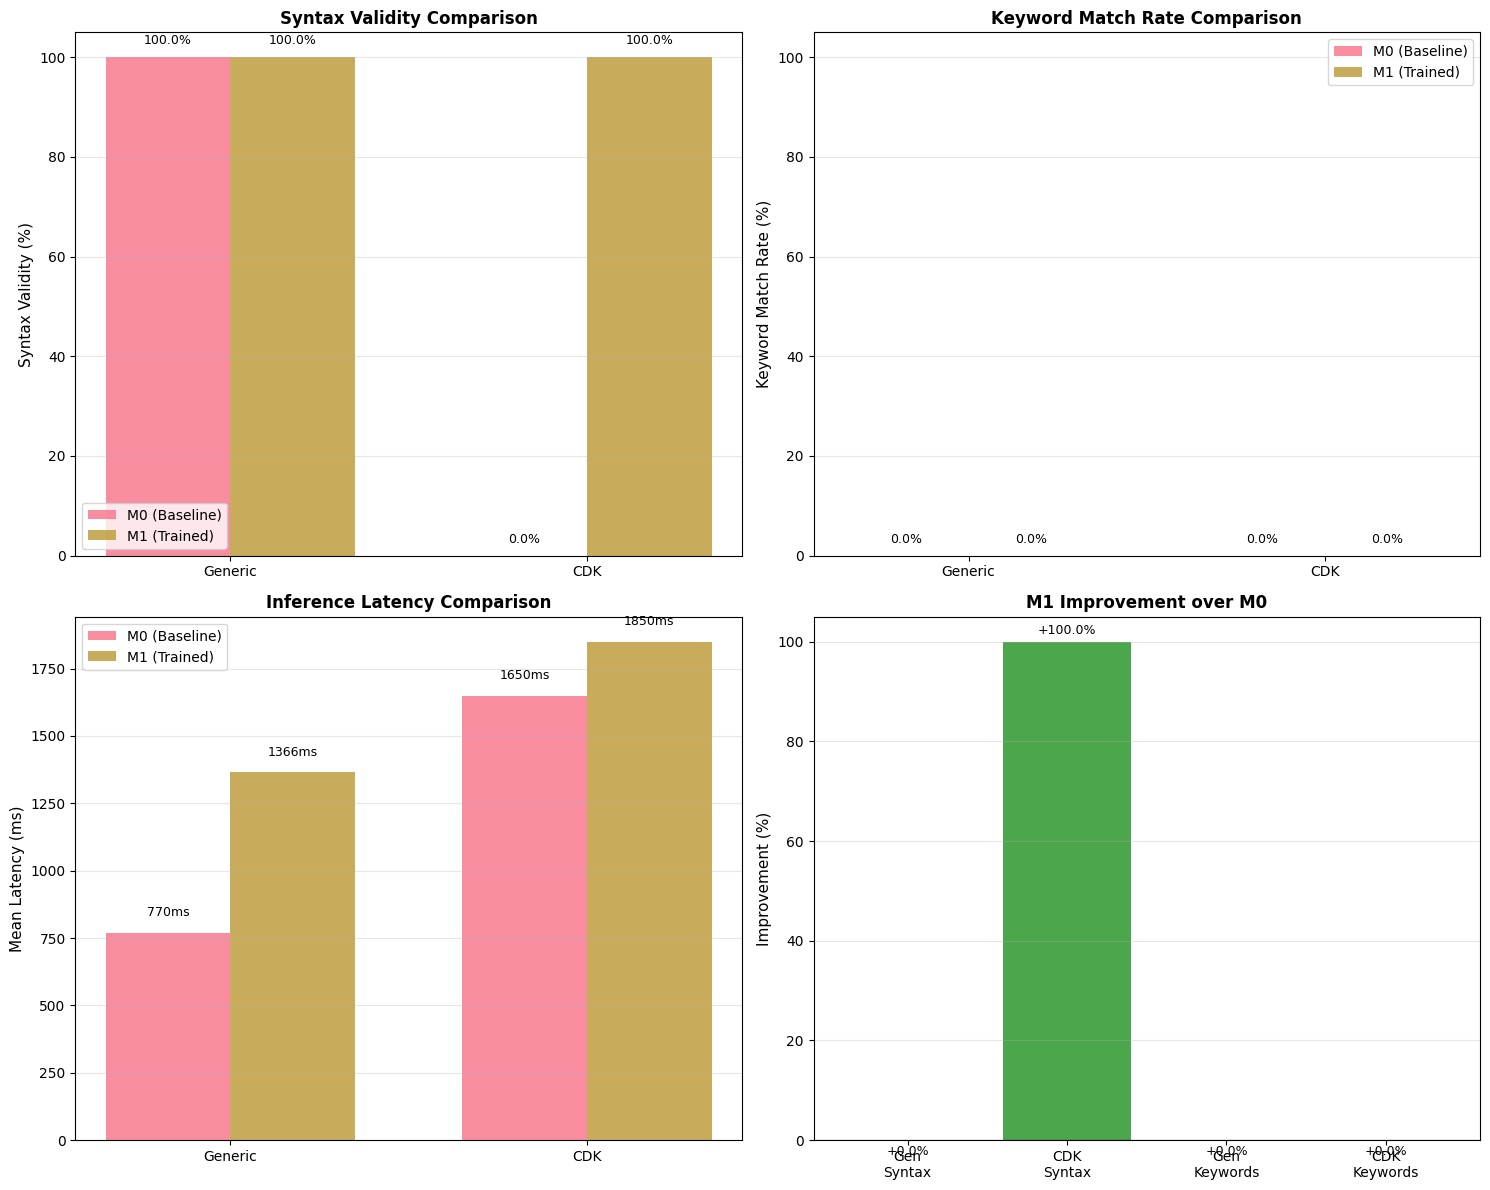


✓ Visualization saved to: /storage/homefs/ai22t082/code_complete/evaluation/model_comparison.png


In [15]:
# Create comprehensive comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Syntax Validity Comparison
ax1 = axes[0, 0]
categories = ['Generic', 'CDK']
baseline_validity = [
    baseline_gen['syntax_validity_percent'],
    baseline_cdk['syntax_validity_percent']
]
trained_validity = [
    trained_gen['syntax_validity_percent'],
    trained_cdk['syntax_validity_percent']
]

x = np.arange(len(categories))
width = 0.35
ax1.bar(x - width/2, baseline_validity, width, label='M0 (Baseline)', alpha=0.8)
ax1.bar(x + width/2, trained_validity, width, label='M1 (Trained)', alpha=0.8)
ax1.set_ylabel('Syntax Validity (%)', fontsize=11)
ax1.set_title('Syntax Validity Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([0, 105])

# Add value labels
for i, (b, t) in enumerate(zip(baseline_validity, trained_validity)):
    ax1.text(i - width/2, b + 2, f'{b:.1f}%', ha='center', va='bottom', fontsize=9)
    ax1.text(i + width/2, t + 2, f'{t:.1f}%', ha='center', va='bottom', fontsize=9)

# 2. Keyword Match Rate Comparison
ax2 = axes[0, 1]
baseline_keywords = [
    baseline_gen.get('keyword_match_rate', 0) * 100,
    baseline_cdk.get('keyword_match_rate', 0) * 100
]
trained_keywords = [
    trained_gen.get('keyword_match_rate', 0) * 100,
    trained_cdk.get('keyword_match_rate', 0) * 100
]

ax2.bar(x - width/2, baseline_keywords, width, label='M0 (Baseline)', alpha=0.8)
ax2.bar(x + width/2, trained_keywords, width, label='M1 (Trained)', alpha=0.8)
ax2.set_ylabel('Keyword Match Rate (%)', fontsize=11)
ax2.set_title('Keyword Match Rate Comparison', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0, 105])

for i, (b, t) in enumerate(zip(baseline_keywords, trained_keywords)):
    ax2.text(i - width/2, b + 2, f'{b:.1f}%', ha='center', va='bottom', fontsize=9)
    ax2.text(i + width/2, t + 2, f'{t:.1f}%', ha='center', va='bottom', fontsize=9)

# 3. Latency Comparison
ax3 = axes[1, 0]
baseline_latency = [
    baseline_gen['mean_latency_ms'],
    baseline_cdk['mean_latency_ms']
]
trained_latency = [
    trained_gen['mean_latency_ms'],
    trained_cdk['mean_latency_ms']
]

ax3.bar(x - width/2, baseline_latency, width, label='M0 (Baseline)', alpha=0.8)
ax3.bar(x + width/2, trained_latency, width, label='M1 (Trained)', alpha=0.8)
ax3.set_ylabel('Mean Latency (ms)', fontsize=11)
ax3.set_title('Inference Latency Comparison', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

for i, (b, t) in enumerate(zip(baseline_latency, trained_latency)):
    ax3.text(i - width/2, b + 50, f'{b:.0f}ms', ha='center', va='bottom', fontsize=9)
    ax3.text(i + width/2, t + 50, f'{t:.0f}ms', ha='center', va='bottom', fontsize=9)

# 4. Overall Improvement
ax4 = axes[1, 1]
improvements = [
    trained_gen['syntax_validity_percent'] - baseline_gen['syntax_validity_percent'],
    trained_cdk['syntax_validity_percent'] - baseline_cdk['syntax_validity_percent'],
    (trained_gen.get('keyword_match_rate', 0) - baseline_gen.get('keyword_match_rate', 0)) * 100,
    (trained_cdk.get('keyword_match_rate', 0) - baseline_cdk.get('keyword_match_rate', 0)) * 100
]
labels = ['Gen\nSyntax', 'CDK\nSyntax', 'Gen\nKeywords', 'CDK\nKeywords']
colors = ['green' if imp > 0 else 'red' for imp in improvements]

bars = ax4.bar(range(len(improvements)), improvements, color=colors, alpha=0.7)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax4.set_ylabel('Improvement (%)', fontsize=11)
ax4.set_title('M1 Improvement over M0', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(labels)))
ax4.set_xticklabels(labels)
ax4.grid(True, alpha=0.3, axis='y')

for i, (bar, imp) in enumerate(zip(bars, improvements)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -1),
             f'{imp:+.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.savefig(EVAL_DIR / 'model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualization saved to: {EVAL_DIR / 'model_comparison.png'}")

## Detailed Sample Comparison

Compare specific generated code samples side-by-side.

In [16]:
# Show side-by-side comparison of generated code
print("Detailed Sample Comparison")
print("=" * 80)

# Get detailed results
baseline_gen_details = baseline_results['generic_evaluation']['detailed_results']
trained_gen_details = trained_results['generic_evaluation']['detailed_results']

# Compare first few samples
for i in range(min(3, len(baseline_gen_details))):
    baseline_sample = baseline_gen_details[i]
    trained_sample = trained_gen_details[i]
    
    print(f"\nSample {i+1}: {baseline_sample['name']}")
    print("-" * 80)
    print(f"Prompt: {baseline_sample['prompt'][:100]}...")
    
    print(f"\nM0 (Baseline):")
    print(f"  Generated: {baseline_sample['generated'][:150]}...")
    print(f"  Syntax valid: {'✓' if baseline_sample['syntax_valid'] else '✗'}")
    print(f"  Keywords: {len(baseline_sample['keywords_found'])}/{len(baseline_sample['keywords_expected'])}")
    print(f"  Latency: {baseline_sample['latency_ms']:.1f}ms")
    
    print(f"\nM1 (Trained):")
    print(f"  Generated: {trained_sample['generated'][:150]}...")
    print(f"  Syntax valid: {'✓' if trained_sample['syntax_valid'] else '✗'}")
    print(f"  Keywords: {len(trained_sample['keywords_found'])}/{len(trained_sample['keywords_expected'])}")
    print(f"  Latency: {trained_sample['latency_ms']:.1f}ms")
    
    print("\n" + "=" * 80)

Detailed Sample Comparison

Sample 1: Factorial Function
--------------------------------------------------------------------------------
Prompt: # Write Python code for the following docstring
"""
Calculate the factorial of a number using recurs...

M0 (Baseline):
  Generated: def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)...
  Syntax valid: ✓
  Keywords: 5/5
  Latency: 889.2ms

M1 (Trained):
  Generated: def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# Test the function
print(factorial(5))  # Output: 120
...
  Syntax valid: ✓
  Keywords: 5/5
  Latency: 1619.5ms


Sample 2: List Filter
--------------------------------------------------------------------------------
Prompt: # Write Python code for the following docstring
"""
Filter a list to keep only even numbers.
Args:
 ...

M0 (Baseline):
  Generated: def filter_even_numbers(numbers):
    """
    Filter a list to keep only even numbers.
  

## Generate Comprehensive Report

In [17]:
# Create comprehensive comparison report
report = {
    "comparison_date": "2026-01-18",
    "models_compared": {
        "M0": {
            "name": baseline_results['model_name'],
            "type": baseline_results['model_type'],
            "description": "Base model without fine-tuning"
        },
        "M1": {
            "name": trained_results['model_name'],
            "type": trained_results['model_type'],
            "description": "Iteratively trained model",
            "training_config": trained_results.get('training_config', {})
        }
    },
    "generic_evaluation": {
        "M0": baseline_gen,
        "M1": trained_gen,
        "improvement": {
            "syntax_validity_percent": trained_gen['syntax_validity_percent'] - baseline_gen['syntax_validity_percent'],
            "keyword_match_rate": (trained_gen.get('keyword_match_rate', 0) - baseline_gen.get('keyword_match_rate', 0)) * 100,
            "mean_latency_ms": trained_gen['mean_latency_ms'] - baseline_gen['mean_latency_ms']
        }
    },
    "cdk_evaluation": {
        "M0": baseline_cdk,
        "M1": trained_cdk,
        "improvement": {
            "syntax_validity_percent": trained_cdk['syntax_validity_percent'] - baseline_cdk['syntax_validity_percent'],
            "keyword_match_rate": (trained_cdk.get('keyword_match_rate', 0) - baseline_cdk.get('keyword_match_rate', 0)) * 100,
            "mean_latency_ms": trained_cdk['mean_latency_ms'] - baseline_cdk['mean_latency_ms']
        }
    },
    "key_findings": [
        f"M1 shows {trained_gen['syntax_validity_percent'] - baseline_gen['syntax_validity_percent']:+.1f}% improvement in generic syntax validity",
        f"M1 shows {trained_cdk['syntax_validity_percent'] - baseline_cdk['syntax_validity_percent']:+.1f}% improvement in CDK syntax validity",
        f"M1 keyword matching improved by {(trained_gen.get('keyword_match_rate', 0) - baseline_gen.get('keyword_match_rate', 0))*100:+.1f}% for generic tasks",
        f"M1 keyword matching improved by {(trained_cdk.get('keyword_match_rate', 0) - baseline_cdk.get('keyword_match_rate', 0))*100:+.1f}% for CDK tasks",
        f"Latency impact: {trained_gen['mean_latency_ms'] - baseline_gen['mean_latency_ms']:+.1f}ms for generic tasks"
    ],
    "recommendations": [
        "Use M1 (trained model) for production deployment" if trained_gen['syntax_validity_percent'] > baseline_gen['syntax_validity_percent'] else "Consider additional training",
        "Monitor latency in production environment",
        "Continue iterative training with more diverse samples",
        "Evaluate on additional CDK-specific test cases"
    ]
}

# Save report
with open(OUTPUT_FILE, 'w') as f:
    json.dump(report, f, indent=2)

print(f"✓ Comprehensive report saved to: {OUTPUT_FILE}")

✓ Comprehensive report saved to: /storage/homefs/ai22t082/code_complete/evaluation/model_comparison_report.json


## Summary

In [18]:
print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)

print("\nModels Evaluated:")
print(f"  M0 (Baseline): {baseline_results['model_name']}")
print(f"  M1 (Trained):  {trained_results['model_name']}")

print("\nKey Findings:")
for i, finding in enumerate(report['key_findings'], 1):
    print(f"  {i}. {finding}")

print("\nRecommendations:")
for i, rec in enumerate(report['recommendations'], 1):
    print(f"  {i}. {rec}")

print("\nOutputs Generated:")
print(f"  ✓ Comparison visualization: {EVAL_DIR / 'model_comparison.png'}")
print(f"  ✓ Detailed report: {OUTPUT_FILE}")

print("=" * 80)
print("\nEvaluation complete! Review the visualizations and report for detailed insights.")
print("\nNext: Notebook 07 - Test inference server API")


MODEL COMPARISON SUMMARY

Models Evaluated:
  M0 (Baseline): /storage/homefs/ai22t082/code_complete/models/base/Qwen/Qwen2.5-Coder-3B
  M1 (Trained):  /storage/homefs/ai22t082/code_complete/models/trained_adapter/best_adapter

Key Findings:
  1. M1 shows +0.0% improvement in generic syntax validity
  2. M1 shows +100.0% improvement in CDK syntax validity
  3. M1 keyword matching improved by +0.0% for generic tasks
  4. M1 keyword matching improved by +0.0% for CDK tasks
  5. Latency impact: +596.2ms for generic tasks

Recommendations:
  1. Consider additional training
  2. Monitor latency in production environment
  3. Continue iterative training with more diverse samples
  4. Evaluate on additional CDK-specific test cases

Outputs Generated:
  ✓ Comparison visualization: /storage/homefs/ai22t082/code_complete/evaluation/model_comparison.png
  ✓ Detailed report: /storage/homefs/ai22t082/code_complete/evaluation/model_comparison_report.json

Evaluation complete! Review the visualizatio